Python Internship Project-

Ola Churn Analysis

Define Problem Statement and Perform Exploratory Data Analysis (10 points)

Question 1-Definition of Problem:

Understand the challenge of driver attrition and its impact on Ola.

Answer-Many drivers leave Ola frequently or switch to Uber for better pay. This makes it hard for Ola to maintain a stable workforce.
Finding and training new drivers costs a lot of money. It is cheaper to retain existing drivers than to keep hiring new ones.
When too many drivers leave, it affects customer service, increases ride cancellations, and leads to longer wait times for passengers.

Impact on Ola:
1. Higher costs for hiring and training new drivers

2. Lower service quality due to driver shortages

3. Loss of experienced drivers, affecting customer satisfaction

4. Reduced profits because frequent hiring is expensive

Loading the data

In [2]:
import pandas as pd
df = pd.read_csv("ola_driver - ola_driver.csv")

Checking the data shape

In [3]:
# Checking the data shape
df.shape

(19104, 14)

Checking the data type of each column

In [4]:
#checking the data type of each column
df.dtypes

,0
Unnamed: 0,int64
MMM-YY,object
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,int64
Income,int64
Dateofjoining,object
LastWorkingDate,object


 Conversion to text data types

In [5]:
# conversion to text data types
column_data_type_conversion = ["Driver_ID", "Gender", "Education_Level", "Joining Designation", "Grade"]

df[column_data_type_conversion] = df[column_data_type_conversion].astype(str)

Detect missing values

In [6]:
#Detect missing values
df.isnull().sum()

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488


Perform statistical summary to understand data distribution.

In [7]:
#Perform statistical summary to understand data distribution.
df.describe()

,Unnamed: 0,Age,Income,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,34.668435,65652.025126,5.716621e+05,2.008899
std,5514.994107,6.257912,30914.515344,1.128312e+06,1.009832
min,0.000000,21.000000,10747.000000,-6.000000e+06,1.000000
25%,4775.750000,30.000000,42383.000000,0.000000e+00,1.000000
50%,9551.500000,34.000000,60087.000000,2.500000e+05,2.000000
75%,14327.250000,39.000000,83969.000000,6.997000e+05,3.000000
max,19103.000000,58.000000,188418.000000,3.374772e+07,4.000000


Handle missing values using mean, median, or mode for numerical features.

In [8]:
#Handle missing values using mean, median, or mode for numerical features.
# filling null values of age column
df["Age"].fillna(df["Age"].mean(), inplace=True)

<ipython-input-8-a227f19ce7bc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)


Feature Engineering: Create a target variable indicating whether a driver has left the company based on LastWorkingDate.

In [9]:
#Feature Engineering: Create a target variable indicating whether a driver has left the company based on LastWorkingDate.
df["Is_Driver_available"]=df["LastWorkingDate"].isnull().astype("int")
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Is_Driver_available
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,1
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,1
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,0
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,1


Calculate age of each driver based on Date Of Joining

In [10]:
#Calculate age of each driver based on Date Of Joining

df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"])

df["Years_after_joining"] = pd.Timestamp.today().year - df["Dateofjoining"].dt.year


df["Current Age"] = df["Age"] + df["Years_after_joining"]


df[["Driver_ID", "Age", "Dateofjoining", "Current Age"]].head()


<ipython-input-10-7b30dd0180f2>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"])


,Driver_ID,Age,Dateofjoining,Current Age
0,1,28.0,2018-12-24,35.0
1,1,28.0,2018-12-24,35.0
2,1,28.0,2018-12-24,35.0
3,2,31.0,2020-11-06,36.0
4,2,31.0,2020-11-06,36.0


Determine if quarterly rating has increased (1 if yes, 0 if no).

In [11]:
#Determine if quarterly rating has increased (1 if yes, 0 if no).

df = df.sort_values(by=["Driver_ID", "MMM-YY"]) # firstly sorted the values in ascending order.
df["Rating_Increased"] = df.groupby("Driver_ID")["Quarterly Rating"].diff().gt(0).astype(int)
df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Is_Driver_available,Years_after_joining,Current Age,Rating_Increased
0,0,01/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,2381060,2,1,7,35.0,0
1,1,02/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,-665480,2,1,7,35.0,0
2,2,03/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,03/11/19,1,1,0,2,0,7,35.0,0
6674,6674,01/01/20,1000,27.0,1.0,C3,2,56016,2019-11-28,NaN,1,1,0,1,1,6,33.0,0
6675,6675,02/01/20,1000,28.0,1.0,C3,2,56016,2019-11-28,NaN,1,1,0,1,1,6,34.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,6668,08/01/20,999,23.0,1.0,C20,1,36811,2020-05-05,NaN,2,2,180170,2,1,5,28.0,0
6669,6669,09/01/20,999,23.0,1.0,C20,1,36811,2020-05-05,NaN,2,2,274440,2,1,5,28.0,0
6670,6670,10/01/20,999,23.0,1.0,C20,1,36811,2020-05-05,NaN,2,2,845830,2,1,5,28.0,0
6671,6671,11/01/20,999,23.0,1.0,C20,1,36811,2020-05-05,NaN,2,2,0,2,1,5,28.0,0


Identify if monthly income has increased (1 if yes, 0 if no).

In [12]:
 #Identify if monthly income has increased (1 if yes, 0 if no).
df["Month"] = pd.to_datetime(df["MMM-YY"]).dt.to_period("M")  # Converting to month format
df["Is_Income_Increased"] = df.groupby(["Driver_ID", "Month"])["Income"].diff().gt(0).astype(int)
df

<ipython-input-12-c2c982de9ffa>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Month"] = pd.to_datetime(df["MMM-YY"]).dt.to_period("M")  # Converting to month format
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Is_Driver_available,Years_after_joining,Current Age,Rating_Increased,Month,Is_Income_Increased
0,0,01/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,2381060,2,1,7,35.0,0,2019-01,0
1,1,02/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,-665480,2,1,7,35.0,0,2019-02,0
2,2,03/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,03/11/19,1,1,0,2,0,7,35.0,0,2019-03,0
6674,6674,01/01/20,1000,27.0,1.0,C3,2,56016,2019-11-28,NaN,1,1,0,1,1,6,33.0,0,2020-01,0
6675,6675,02/01/20,1000,28.0,1.0,C3,2,56016,2019-11-28,NaN,1,1,0,1,1,6,34.0,0,2020-02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,6668,08/01/20,999,23.0,1.0,C20,1,36811,2020-05-05,NaN,2,2,180170,2,1,5,28.0,0,2020-08,0
6669,6669,09/01/20,999,23.0,1.0,C20,1,36811,2020-05-05,NaN,2,2,274440,2,1,5,28.0,0,2020-09,0
6670,6670,10/01/20,999,23.0,1.0,C20,1,36811,2020-05-05,NaN,2,2,845830,2,1,5,28.0,0,2020-10,0
6671,6671,11/01/20,999,23.0,1.0,C20,1,36811,2020-05-05,NaN,2,2,0,2,1,5,28.0,0,2020-11,0


Check for class imbalance in the target variable.

In [13]:
#Check for class imbalance in the target variable.
Driver_available_vs_not_available=df["Is_Driver_available"].value_counts()
Driver_available_vs_not_available


,count
Is_Driver_available,
1,17488
0,1616


([<matplotlib.patches.Wedge at 0x7aaecc1fa1d0>,
 [Text(-1.0613865244046894, 0.2888921006398996, '1'),
  Text(1.0613865496604358, -0.2888920078505379, '0')])

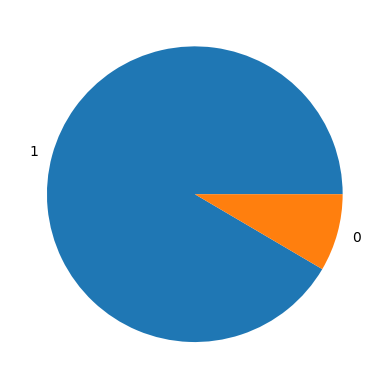

In [14]:
#Check for class imbalance in the target variable.
import matplotlib.pyplot as plt
plt.pie(Driver_available_vs_not_available,labels=Driver_available_vs_not_available.index)

Insights from above graph-

Class Imbalance Observed-

1. There is a significant class imbalance in the Is_Driver_available variable.

2. 17,488 drivers (91.55%) are available, while 1,616 drivers (8.45%) are not available.

Potential Issues Due to Imbalance-

1. If used for a predictive model, the imbalance might cause biased results.

2. The model may favor the majority class (drivers available) and underperform in predicting driver churn.

What is the structure of the dataset (number of rows and columns)

In [15]:
#What is the structure of the dataset (number of rows and columns)
df.shape

(19104, 20)

What are the data types of each column?

In [16]:
#What are the data types of each column?
df.dtypes

,0
Unnamed: 0,int64
MMM-YY,object
Driver_ID,object
Age,float64
Gender,object
City,object
Education_Level,object
Income,int64
Dateofjoining,datetime64[ns]
LastWorkingDate,object


Are there any missing values in the dataset? If so, which columns are affected?

In [17]:
#Are there any missing values in the dataset? If so, which columns are affected?
df.isnull().sum()

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488


What are the basic statistics (mean, median, standard deviation) for numerical features like Age, Income, Total Business Value, and Quarterly Rating?

In [18]:
#What are the basic statistics (mean, median, standard deviation) for numerical features like Age, Income, Total Business Value, and Quarterly Rating?
column_data_type_conversion = ["Driver_ID", "Gender", "Education_Level", "Joining Designation", "Grade"]

df[column_data_type_conversion] = df[column_data_type_conversion].astype(str)

df.describe()

,Unnamed: 0,Age,Income,Dateofjoining,Total Business Value,Quarterly Rating,Is_Driver_available,Years_after_joining,Current Age,Rating_Increased,Is_Income_Increased
count,19104.000000,19104.000000,19104.000000,19104,1.910400e+04,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,19104.0
mean,9551.500000,34.668435,65652.025126,2018-04-28 20:52:54.874372096,5.716621e+05,2.008899,0.915410,7.223670,41.892105,0.146200,0.0
min,0.000000,21.000000,10747.000000,2013-04-01 00:00:00,-6.000000e+06,1.000000,0.000000,5.000000,26.000000,0.000000,0.0
25%,4775.750000,30.000000,42383.000000,2016-11-29 12:00:00,0.000000e+00,1.000000,1.000000,6.000000,37.000000,0.000000,0.0
50%,9551.500000,34.000000,60087.000000,2018-09-12 00:00:00,2.500000e+05,2.000000,1.000000,7.000000,41.000000,0.000000,0.0
75%,14327.250000,39.000000,83969.000000,2019-11-05 00:00:00,6.997000e+05,3.000000,1.000000,9.000000,47.000000,0.000000,0.0
max,19103.000000,58.000000,188418.000000,2020-12-28 00:00:00,3.374772e+07,4.000000,1.000000,12.000000,65.000000,1.000000,0.0
std,5514.994107,6.247912,30914.515344,NaN,1.128312e+06,1.009832,0.278277,1.920872,7.038238,0.353316,0.0


How many unique drivers are there in the dataset?

In [19]:
#How many unique drivers are there in the dataset?
df["Driver_ID"].nunique()

2381

How many drivers joined each month?

In [20]:
#How many drivers joined each month?
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"]) # conversion of column to date format
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"],errors="coerce")

df["Joining_Month"] = df["Dateofjoining"].dt.month # extraction of month from date
df["Leaving_month"] = df["LastWorkingDate"].dt.month

joins_per_month = df["Joining_Month"].value_counts().sort_index() # counting how many driver joined each month
exits_per_month = df["Leaving_month"].value_counts().sort_index()

joins_per_month


<ipython-input-20-04a2a9c86f3a>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"],errors="coerce")


,count
Joining_Month,
1,1381
2,684
3,402
4,1014
5,2362
6,1973
7,2730
8,1886
9,1449


How many drivers left each month?

In [21]:
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"]) # conversion of column to date format
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"],errors="coerce")

df["Joining_Month"] = df["Dateofjoining"].dt.month # extraction of month from date
df["Leaving_month"] = df["LastWorkingDate"].dt.month

joins_per_month = df["Joining_Month"].value_counts().sort_index() # counting how many driver left each month
left_per_month = df["Leaving_month"].value_counts().sort_index()

left_per_month

,count
Leaving_month,
1.0,152
2.0,155
3.0,133
4.0,91
5.0,161
6.0,138
7.0,189
8.0,57
9.0,145


Can we determine the average tenure of drivers in the dataset?

In [22]:
#Can we determine the average tenure of drivers in the dataset?

# Converting columns to datetime format
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"], errors="coerce")
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"], errors="coerce")

# Replacing missing values in LastWorkingDate with today's date.
df["LastWorkingDate"].fillna(pd.to_datetime("today"), inplace=True)

# Calculating total number of days drivers worked
df["Total_no_of_days"] = (df["LastWorkingDate"] - df["Dateofjoining"]).dt.days

# Calculating average days
average_tenure = df["Total_no_of_days"].mean()

average_tenure

<ipython-input-22-9d2bc88ea722>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LastWorkingDate"].fillna(pd.to_datetime("today"), inplace=True)


np.float64(2362.453465242881)

Average tenure of drivers is 2361 days

How can we create a target variable to indicate whether a driver has left the company based on LastWorkingDate?

In [23]:
#How can we create a target variable to indicate whether a driver has left the company based on LastWorkingDate?
df["Is_Driver_available"]=df["LastWorkingDate"].isnull().astype("int")
df


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,...,Quarterly Rating,Is_Driver_available,Years_after_joining,Current Age,Rating_Increased,Month,Is_Income_Increased,Joining_Month,Leaving_month,Total_no_of_days
0,0,01/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,2025-03-28 18:04:44.736079,...,2,0,7,35.0,0,2019-01,0,12,NaN,2286
1,1,02/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,2025-03-28 18:04:44.736079,...,2,0,7,35.0,0,2019-02,0,12,NaN,2286
2,2,03/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11 00:00:00.000000,...,2,0,7,35.0,0,2019-03,0,12,3.0,77
6674,6674,01/01/20,1000,27.0,1.0,C3,2,56016,2019-11-28,2025-03-28 18:04:44.736079,...,1,0,6,33.0,0,2020-01,0,11,NaN,1947
6675,6675,02/01/20,1000,28.0,1.0,C3,2,56016,2019-11-28,2025-03-28 18:04:44.736079,...,1,0,6,34.0,0,2020-02,0,11,NaN,1947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,6668,08/01/20,999,23.0,1.0,C20,1,36811,2020-05-05,2025-03-28 18:04:44.736079,...,2,0,5,28.0,0,2020-08,0,5,NaN,1788
6669,6669,09/01/20,999,23.0,1.0,C20,1,36811,2020-05-05,2025-03-28 18:04:44.736079,...,2,0,5,28.0,0,2020-09,0,5,NaN,1788
6670,6670,10/01/20,999,23.0,1.0,C20,1,36811,2020-05-05,2025-03-28 18:04:44.736079,...,2,0,5,28.0,0,2020-10,0,5,NaN,1788
6671,6671,11/01/20,999,23.0,1.0,C20,1,36811,2020-05-05,2025-03-28 18:04:44.736079,...,2,0,5,28.0,0,2020-11,0,5,NaN,1788


What additional features can we extract from Dateofjoining, such as tenure or duration of employment?

In [24]:

#What additional features can we extract from Dateofjoining, such as tenure or duration of employment?
# Converting  Date of Joining column to datetime format
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"], errors="coerce")
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"], errors="coerce")

# Fill missing LastWorkingDate with today's date for active drivers
df["LastWorkingDate"].fillna(pd.to_datetime("today"), inplace=True)

# Calculating "Total_no_of_days", "Total_no_of_months", "Total_no_of_years" drivers worked
df["Total_no_of_days"] = (df["LastWorkingDate"] - df["Dateofjoining"]).dt.days
df["Total_no_of_months"] = df["Total_no_of_days"] // 30  # Approximate months
df["Total_no_of_years"] = df["Total_no_of_days"] // 365  # Corrected years calculation

df


<ipython-input-24-5c4d31a09ec6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LastWorkingDate"].fillna(pd.to_datetime("today"), inplace=True)


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,...,Years_after_joining,Current Age,Rating_Increased,Month,Is_Income_Increased,Joining_Month,Leaving_month,Total_no_of_days,Total_no_of_months,Total_no_of_years
0,0,01/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,2025-03-28 18:04:44.736079,...,7,35.0,0,2019-01,0,12,NaN,2286,76,6
1,1,02/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,2025-03-28 18:04:44.736079,...,7,35.0,0,2019-02,0,12,NaN,2286,76,6
2,2,03/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11 00:00:00.000000,...,7,35.0,0,2019-03,0,12,3.0,77,2,0
6674,6674,01/01/20,1000,27.0,1.0,C3,2,56016,2019-11-28,2025-03-28 18:04:44.736079,...,6,33.0,0,2020-01,0,11,NaN,1947,64,5
6675,6675,02/01/20,1000,28.0,1.0,C3,2,56016,2019-11-28,2025-03-28 18:04:44.736079,...,6,34.0,0,2020-02,0,11,NaN,1947,64,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,6668,08/01/20,999,23.0,1.0,C20,1,36811,2020-05-05,2025-03-28 18:04:44.736079,...,5,28.0,0,2020-08,0,5,NaN,1788,59,4
6669,6669,09/01/20,999,23.0,1.0,C20,1,36811,2020-05-05,2025-03-28 18:04:44.736079,...,5,28.0,0,2020-09,0,5,NaN,1788,59,4
6670,6670,10/01/20,999,23.0,1.0,C20,1,36811,2020-05-05,2025-03-28 18:04:44.736079,...,5,28.0,0,2020-10,0,5,NaN,1788,59,4
6671,6671,11/01/20,999,23.0,1.0,C20,1,36811,2020-05-05,2025-03-28 18:04:44.736079,...,5,28.0,0,2020-11,0,5,NaN,1788,59,4


What are the distributions of Age, Income, and Total Business Value?

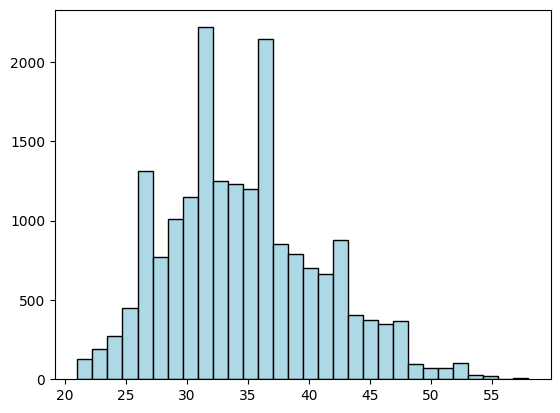

In [25]:
#What are the distributions of Age, Income, and Total Business Value?
#What are the distributions of Age?
plt.hist(df["Age"],bins=30,color="lightblue",edgecolor="black")
plt.show()

Insights from above graph-
1. The histogram shows that the majority of drivers fall within the 30 to 40-year-old range.
2. There are fewer drivers below 25 and above 45, suggesting that younger individuals might not prefer this job or may lack the required driving experience.
3. Similarly, drivers above 50 years are very few, indicating that older individuals may leave the workforce earlier due to physical strain or other factors.

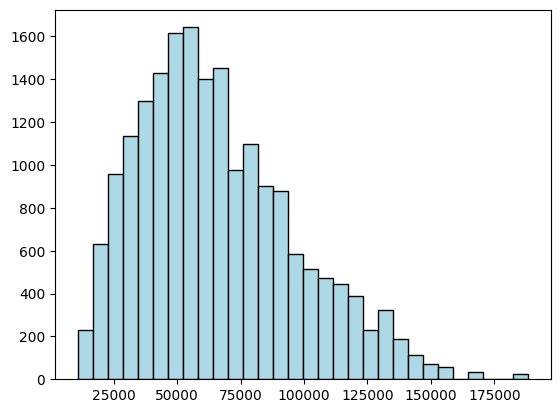

In [26]:
# distribution of income
plt.hist(df["Income"],bins=30,color="lightblue",edgecolor="black")
plt.show()

Insights from above graph-

1. Most drivers earn between ₹50,000 - ₹75,000.

2. Very few earn above ₹1,25,000, showing an income gap.

3. The income distribution is right-skewed, meaning fewer high earners.


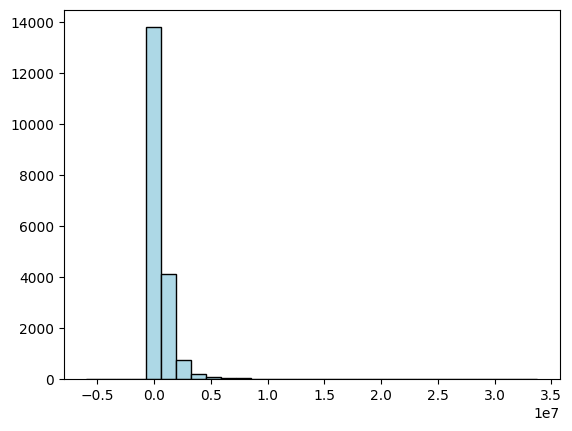

In [27]:
#What are the distributions of Total Business Value?
plt.hist(df["Total Business Value"],bins=30,color="lightblue",edgecolor="black")
plt.show()


Insights from above graph-

1. Most drivers have very low Total Business Value, clustered near zero.

2. A few drivers have very high values, creating a right-skewed distribution.

3. This suggests a few top performers contribute a significant share of the business.

How does Quarterly Rating vary across different drivers and time periods?


<ipython-input-28-9df7aa66e31d>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["MMM-YY"] = pd.to_datetime(df["MMM-YY"])


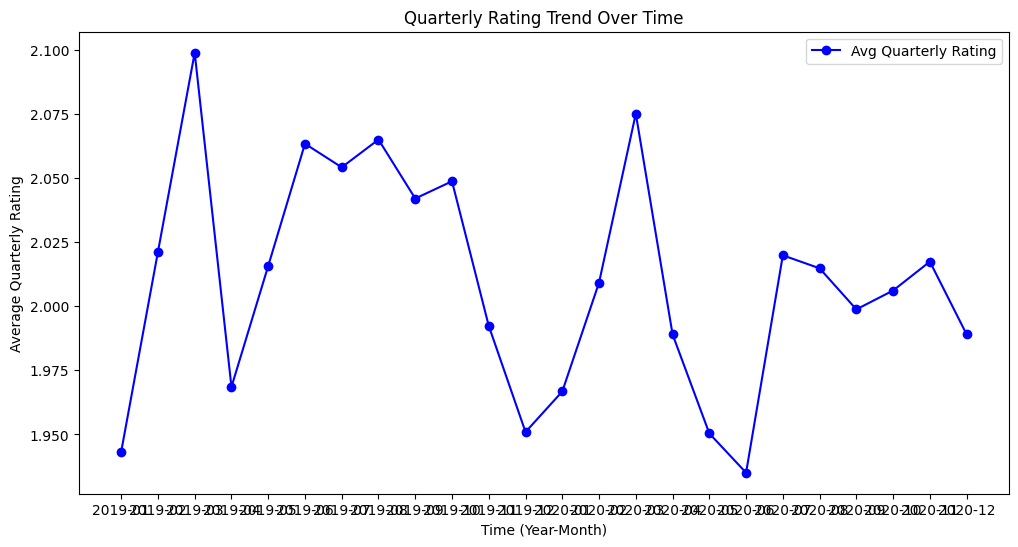

In [28]:
#How does Quarterly Rating vary across different drivers and time periods?
#conversion to datetime format
df["MMM-YY"] = pd.to_datetime(df["MMM-YY"])

#Extracting month from "MMM-YY" column
df["Month"] = df["MMM-YY"].dt.to_period("M")

# Calculating Average Quarter Rating for each month
rating_trend = df.groupby("Month")["Quarterly Rating"].mean()
# Line Graph
plt.figure(figsize=(12, 6))
plt.plot(rating_trend.index.astype(str), rating_trend.values, marker="o", linestyle="-", color="b", label="Avg Quarterly Rating")
plt.xlabel("Time (Year-Month)")
plt.ylabel("Average Quarterly Rating")
plt.title("Quarterly Rating Trend Over Time")
plt.legend()
plt.show()


How should missing values in LastWorkingDate be treated, considering it indicates whether a driver has left?

In [29]:
#How should missing values in LastWorkingDate be treated, considering it indicates whether a driver has left?
df["LastWorkingDate"].fillna("Present", inplace=True)

<ipython-input-29-3813c5cbbbdd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LastWorkingDate"].fillna("Present", inplace=True)



Are there any trends or patterns in the monthly income or business value acquired?

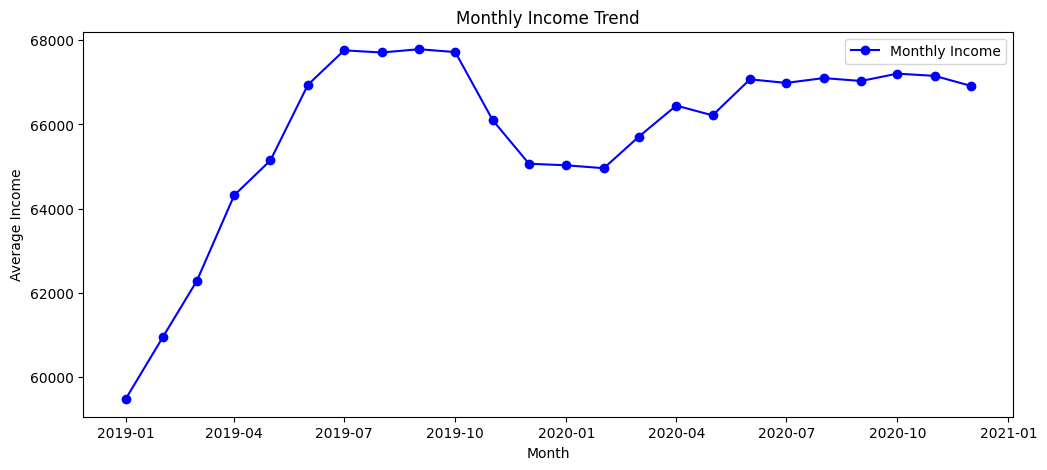

In [30]:

#Are there any trends or patterns in the monthly income or business value acquired?
#Converting "MMM-YY" column to datetime format
df["Month"] = pd.to_datetime(df["MMM-YY"])  # Auto-detects format

# Sort data in ascending order
df = df.sort_values(by="Month")

#calculating average income for each month
monthly_income_trend = df.groupby("Month")["Income"].mean()

# line chart
plt.figure(figsize=(12, 5))
plt.plot(monthly_income_trend, marker="o", linestyle="-", color="b", label="Monthly Income")
plt.xlabel("Month")
plt.ylabel("Average Income")
plt.title("Monthly Income Trend")
plt.legend()
plt.show()




Insights-

Strong Growth Phase (Early 2019 - Mid 2019): The monthly income showed a steady upward trend, indicating increasing demand and business expansion.

Decline & Fluctuations (Late 2019 - Early 2020): A noticeable dip in income occurred, possibly due to seasonality, market shifts, or external factors like competition or economic slowdowns.

Recovery & Stability (Mid 2020 - 2021): The business recovered from the decline, showing resilience with stable income levels, despite some fluctuations.

Potential Pandemic Impact (2020): The fluctuations in 2020 could be linked to COVID-19 disruptions, affecting demand but eventually leading to a recovery phase.

Calculating Average of total business value for each month

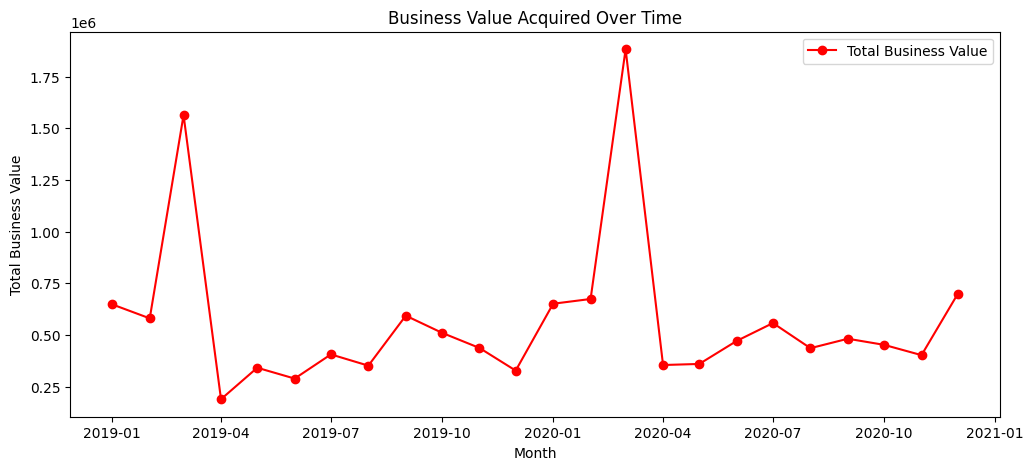

In [31]:
#Calculating Average of total business value for each month
business_value_trend = df.groupby("Month")["Total Business Value"].mean()

# line plot
plt.figure(figsize=(12, 5))
plt.plot(business_value_trend, marker="o", linestyle="-", color="r", label="Total Business Value")
plt.xlabel("Month")
plt.ylabel("Total Business Value")
plt.title("Business Value Acquired Over Time")
plt.legend()
plt.show()

Insights-

Fluctuating Business Trends – Business value shows significant ups and downs, indicating variability in performance across months.

Notable Spikes in 2019 & 2020 – Sharp increases in business value suggest the impact of special events, promotions, or seasonal demand.

Sudden Declines Post-Growth – Rapid drops following peak months indicate that growth was not sustained over time.

Gradual Recovery Over Time – After declines, business value shows a slow yet steady improvement, though not reaching previous peak levels.

Is there a correlation between Age and Income?

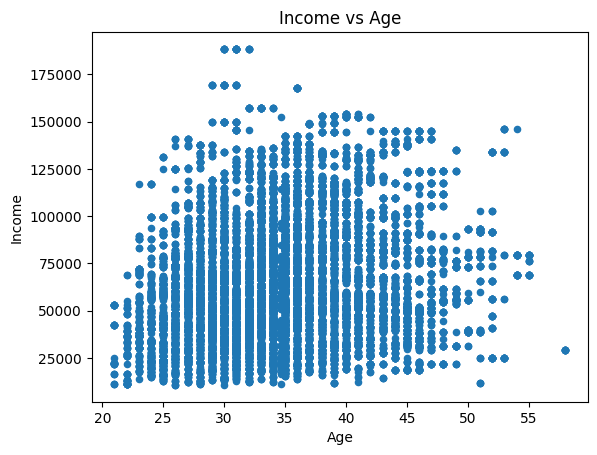

In [32]:
#Is there a correlation between Age and Income?
df.plot.scatter(x="Age",y="Income",title="Income vs Age")
plt.show()

Insights-

Income Grows with Experience – Most people earn more between ages 30 to 45, likely as they gain experience and move up in their careers.

More Variation in Income at Older Ages – After 40, some people earn a lot while others earn much less, possibly due to different career paths, promotions, or industry shifts.

Lower Earnings in the Early Career Stage – People in their 20s generally earn less since they are just starting their careers and working in entry-level roles.

No Fixed Pattern Between Age and Income – Income doesn’t just go up with age—other factors like job type, industry, and skills matter a lot too.

How do Education_Level affect Total Business Value?

In [33]:
#How do Education_Level and City affect Total Business Value?
education_impact_on_business_value = df.groupby("Education_Level")["Total Business Value"].mean().sort_values(ascending=False)
education_impact_on_business_value

,Total Business Value
Education_Level,
1,601287.867133
0,565410.657872
2,545364.175755


Insights-

Higher Education Tends to Drive More Business Value-Individuals with Education Level 1 have the highest average total business value (601,288), followed by Level 0 (565,410), and Level 2 (545,364).

How do City affect Total Business Value?

In [34]:
#How do Education_Level and City affect Total Business Value?
city_impact_on_business_value = df.groupby("City")["Total Business Value"].mean().sort_values(ascending=False)
city_impact_on_business_value

,Total Business Value
City,
C13,796263.075571
C29,736637.511111
C12,667282.310867
C26,661837.445339
C5,634855.975610
C16,632585.712271
C19,630978.151986
C14,607931.635802
C28,591406.778917


Insights-

Different cities contribute significantly different average total business values, indicating that location plays a crucial role in business performance.

Are drivers with higher Quarterly Rating more likely to stay longer?

<ipython-input-35-ba28a9074b01>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LastWorkingDate"].fillna(pd.to_datetime("today"), inplace=True)


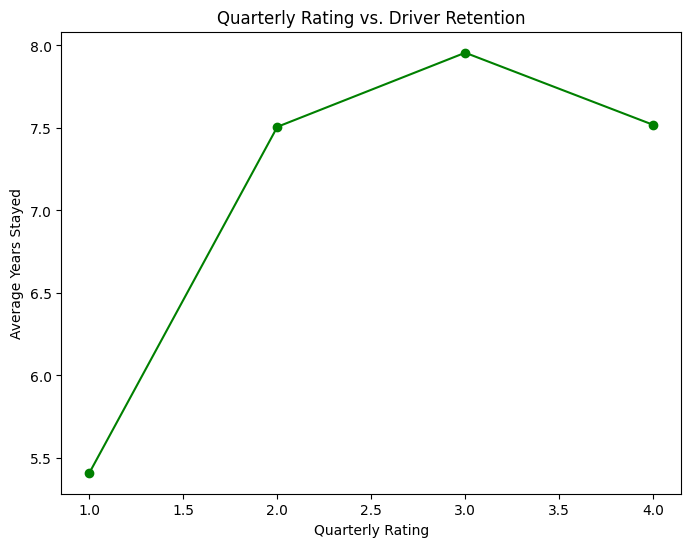

In [35]:
#Are drivers with higher Quarterly Rating more likely to stay longer?

# Converting dates to datetime format
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"])
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"])

# Filling missing LastWorkingDate with today's date
df["LastWorkingDate"].fillna(pd.to_datetime("today"), inplace=True)

# Calculating how many years the driver worked
df["Years Stayed"] = df["LastWorkingDate"].dt.year - df["Dateofjoining"].dt.year

#calculating average years for ach quarter rating
rating_trend = df.groupby("Quarterly Rating")["Years Stayed"].mean()

# line graph
plt.figure(figsize=(8,6))
plt.plot(rating_trend, marker="o", linestyle="-", color="g")
plt.xlabel("Quarterly Rating")
plt.ylabel("Average Years Stayed")
plt.title("Quarterly Rating vs. Driver Retention")
plt.show()


Insights-

The plot indicates that as the Quarterly Rating increases from 1 to 3, the Average Years Stayed also increases.

This suggests that drivers with higher ratings tend to stay longer, which makes sense as high-rated drivers may be more engaged, satisfied, or financially stable.

Interestingly, the trend declines at Rating 4, meaning drivers with the highest rating are leaving earlier than those with a rating of 3.

Highly-rated drivers might get better opportunities elsewhere.

Based on the analysis, what strategies can Ola implement to improve driver retention?

1. Ola should focus on increasing driver income, particularly for those earning in the ₹50,000 - ₹75,000 range, as many drivers leave for better pay

2. They should Implement performance-based incentives or bonuses to motivate drivers and increase their earning potential.



Are there specific demographic groups or performance metrics that require targeted interventions?

1. Drivers in the 30-40 age group represent the majority and should be a primary focus for retention strategies

2. Drivers earning in the ₹50,000 - ₹75,000 range may be more likely to seek alternative opportunities, so targeted interventions to increase their income are crucial

3. Drivers with consistently high Total Business Value are valuable assets and should be incentivized to stay with Ola.



Identify key factors influencing driver attrition.

1. Many drivers feel they’re not making enough money due to reduced fares and high commission fees. If they can’t cover their costs and make a decent living, they’ll look for better opportunities elsewhere.

2. A single low rating or an unfair complaint can hurt a driver’s standing on the platform, making it harder for them to get rides and earn money. Many feel this system is stacked against them.

3. Other ride-hailing services often offer better bonuses or lower commission cuts. Drivers will naturally move to where they feel more valued and better compensated.

Recommend strategies to improve driver retention.

1. Ensure that drivers are paid fairly, with bonuses for peak-hour work and reduced commission fees so they can actually take home a decent income.

2.  Introduce rest periods and encourage work-life balance.

3. The company could focus on understanding why highly-rated drivers leave and implement targeted retention strategies (e.g., better incentives, promotions, or bonuses).

4. Reward drivers based on tenure with perks like lower fees, special discounts, or exclusive offers.

5. Develop retention programs specifically for drivers in the 30-40 age group, as they form the majority of the driver base

6. Allow drivers to choose shifts that better fit their personal lives. Avoid forcing excessive hours.

